# About
Using Darts library

# Libraries

In [1]:
#pip install darts
#pip install ipywidgets widgetsnbextension pandas-profiling
#pip install --update holidays

In [2]:
from darts import TimeSeries #Main data class
from darts.datasets import AirPassengersDataset
import pandas as pd

# UDF

# Data

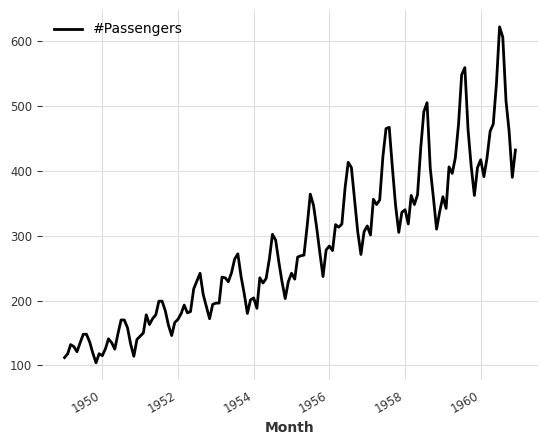

In [3]:
series = AirPassengersDataset().load()
series.plot()

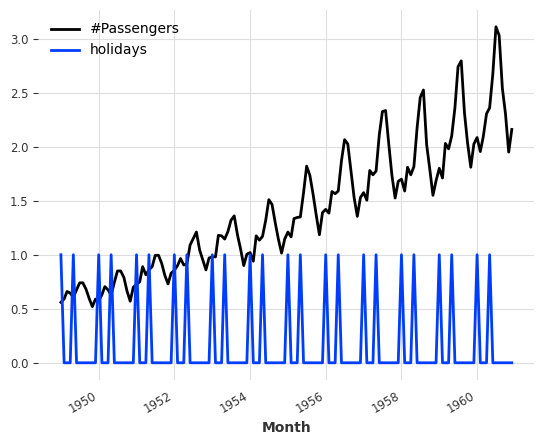

In [4]:
(series / 200).add_holidays("MX").plot()

In [5]:
train, test = series.split_before(pd.Timestamp("19580101"))

In [6]:
train[0]

<TimeSeries (DataArray) (Month: 1, component: 1, sample: 1)>
array([[[112.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

# Seasonality

In [18]:
from darts.utils.statistics import plot_acf, check_seasonality

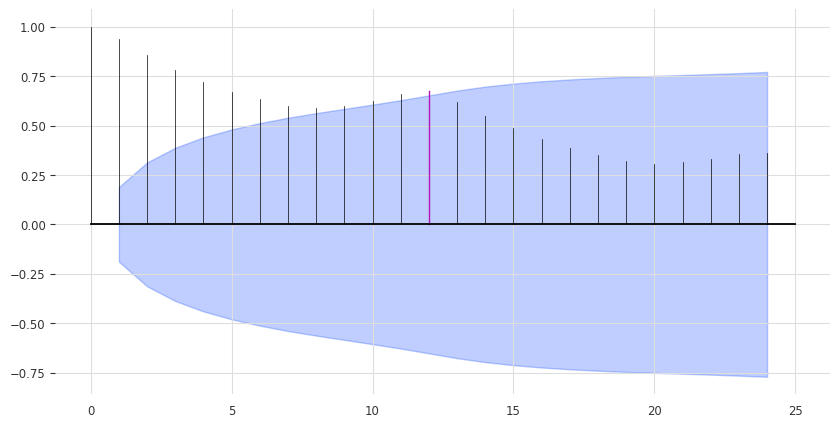

In [28]:
# * alpha: The desired confidence level (default 5%).
plot_acf(train, m=12, alpha = 0.05)

# Red spike is yearly seasonality trend 

In [31]:
type(tuple_seasonality)

NoneType

# Main

## Naive
The Nave Seasonal model repeats the value that occured K steps before.

In [7]:
from darts.models import NaiveSeasonal

In [15]:
# From major seasonality
previous_K = 12
forecast_horizon = 36

In [16]:
naive_model = NaiveSeasonal(K=previous_K)
naive_model.fit(train)
naive_forecast = naive_model.predict(forecast_horizon)

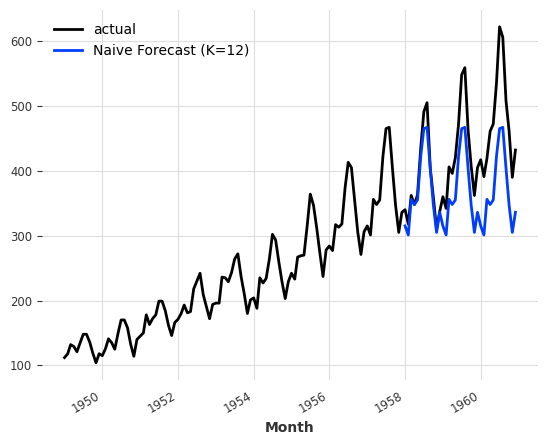

In [17]:
series.plot(label = "actual")
naive_forecast.plot(label = "Naive Forecast (K={})".format(previous_K))

## Metrics

In [32]:
from darts.metrics import mape

In [33]:
print("MAPE seasonality: {:.2f}%".format(mape(series, naive_forecast)))

MAPE seasonality: 13.19%
